# Mercedes-Benz Greener Manufacturing

 Arabaların, testten geçmek için gereken süreyi tahmin etmek üzere Mercedes-Benz otomobil özelliklerinin farklı permütasyonlarını temsil eden bir veri kümesiyle çalışacağız.Amacımız daha düşük karbondioksit emisyonlarıyla sonuçlandırmak.

<img src="https://storage.googleapis.com/kaggle-media/competitions/kaggle/6565/media/daimler-mercedes%20V02.jpg">

Gerçek durum 'y' olarak etiketlenir ve aracın her değişken için testlerden geçmesinin aldığı süreyi (saniye cinsinden) temsil eder.

<a href="https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/data">Dataya Buradan Erişebilrsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(4209, 378)

In [5]:
df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
# Sadece object (string) türündeki sütunların isimlerini almak
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df['X0'] = le.fit_transform(df['X0'])

In [11]:
df['X1'] = le.fit_transform(df['X1'])

In [12]:
df['X2'] = le.fit_transform(df['X2'])

In [13]:
df['X3'] = le.fit_transform(df['X3'])

In [14]:
df['X4'] = le.fit_transform(df['X4'])

In [15]:
df['X5'] = le.fit_transform(df['X5'])

In [16]:
df['X6'] = le.fit_transform(df['X6'])

In [17]:
df['X8'] = le.fit_transform(df['X8'])

In [18]:
#df=pd.get_dummies(df,drop_first=True)

In [19]:
x=df.drop(["y","ID"],axis=1)
y=df["y"]

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [21]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,5.872830e-01,8.014947e+00,5.306997e+00
mlp_regressor,5.647166e-01,8.231150e+00,5.527330e+00
Ridge,5.589220e-01,8.285756e+00,5.616826e+00
XGBRegressor,4.493248e-01,9.258108e+00,6.118493e+00
Lasso,4.085527e-01,9.594724e+00,6.805791e+00
ElasticNet,3.722587e-01,9.884730e+00,7.288765e+00
AdaBoost,3.654049e-01,9.938546e+00,7.054121e+00
SVR,2.081539e-01,1.110184e+01,8.180560e+00
Decision Tree,7.778015e-02,1.198096e+01,7.724510e+00
Extra Tree,1.764706e-02,1.236540e+01,8.020598e+00


In [22]:
GBR=GradientBoostingRegressor()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [24]:
modGB=GBR.fit(x_train,y_train)

In [25]:
tahmin=GBR.predict(x_test)

In [26]:
r2_score(y_test,tahmin)

0.5848426591968833

In [27]:
mean_squared_error(y_test,tahmin)**.5

8.038607779893393

In [28]:
residuals=y_test-tahmin

<Axes: xlabel='y', ylabel='Count'>

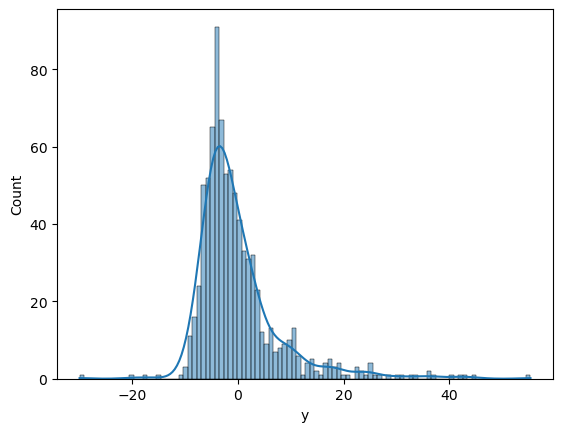

In [29]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='y', ylabel='Density'>

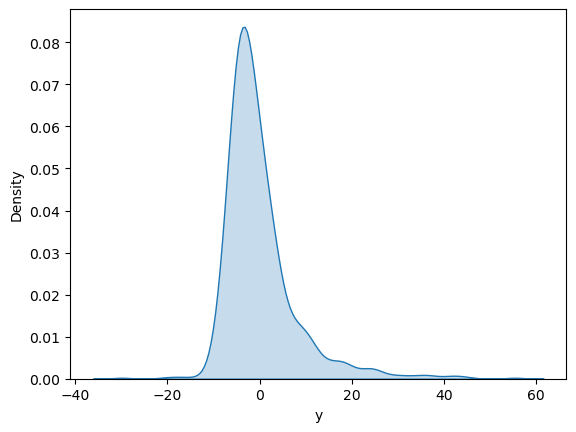

In [30]:
sns.kdeplot(residuals, fill=True)

### Deep Learning

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale

In [32]:
x=df.drop(["y","ID"],axis=1) 
y=df["y"]

In [33]:
x=scale(x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [35]:
model=Sequential()
model.add(Dense(664,activation="relu")) 
model.add(Dense(448,activation="relu")) 
model.add(Dense(332,activation="relu")) 
model.add(Dense(224,activation="relu")) 
model.add(Dense(196,activation="relu")) 
model.add(Dense(148,activation="relu")) 
model.add(Dense(128,activation="relu")) 
model.add(Dense(96,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1, activation='linear'))
model.compile(loss="mse", optimizer="adam") 
                                                                                                              

In [36]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 6965.3882 - val_loss: 405.3030
Epoch 2/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 349.6057 - val_loss: 144.5162
Epoch 3/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 112.4063 - val_loss: 95.0721
Epoch 4/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.9439 - val_loss: 91.1790
Epoch 5/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.8590 - val_loss: 85.9336
Epoch 6/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.9247 - val_loss: 80.8938
Epoch 7/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.7267 - val_loss: 92.4406
Epoch 8/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.2238 - val_loss: 80.1732
Epoch 9/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.1959 - val_loss: 110.3929
Epoch 10/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.0874 - val_loss: 83.2578
Epoch 11/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.5762 - val_loss: 85.5621
Epoch 12/500
27/27 ━━━━━━━━━━━━━━

In [37]:
tahmin=model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [38]:
r2_score(tahmin,y_test)

0.1611053915545826

In [39]:
mean_squared_error(tahmin,y_test)**.5

11.164882673057605

In [40]:
loss_f=pd.DataFrame(history.history)

<Axes: >

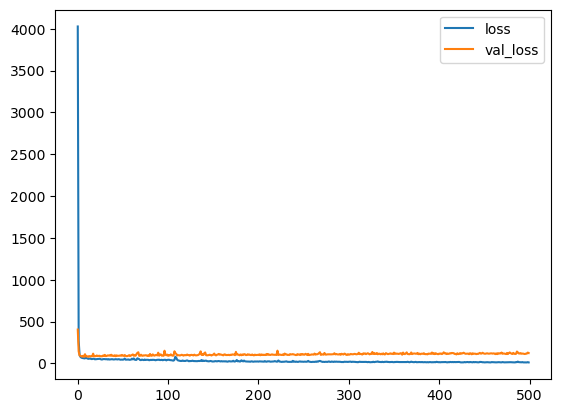

In [41]:
loss_f.plot()

In [42]:
test=pd.read_csv("test.csv")

In [43]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,...,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
le = LabelEncoder()

In [45]:
test['X0'] = le.fit_transform(test['X0'])

In [46]:
test['X1'] = le.fit_transform(test['X1'])

In [47]:
test['X2'] = le.fit_transform(test['X2'])

In [48]:
test['X3'] = le.fit_transform(test['X3'])

In [49]:
test['X4'] = le.fit_transform(test['X4'])

In [50]:
test['X5'] = le.fit_transform(test['X5'])

In [51]:
test['X6'] = le.fit_transform(test['X6'])

In [52]:
test['X8'] = le.fit_transform(test['X8'])

In [53]:
#test=pd.get_dummies(test,drop_first=True)

In [55]:
sonuc=pd.DataFrame()

In [56]:
sonuc["ID"]=test["ID"]

In [57]:
test=test.drop("ID",axis=1)

In [58]:
dnm=modGB.predict(test)

In [59]:
sonuc["y"]=dnm

In [60]:
sonuc

,ID,y
0,1,95.984858
1,2,103.874250
2,3,88.479047
3,4,75.476967
4,5,110.345283
...,...,...
4204,8410,103.141045
4205,8411,96.088486
4206,8413,93.287988
4207,8414,111.340691


In [61]:
sonuc.to_csv("tahmin.csv",index=False)

In [62]:
dnm2=model.predict(test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [63]:
sonuc["y"]=dnm2

In [64]:
sonuc

,ID,y
0,1,345.110260
1,2,383.148071
2,3,231.374466
3,4,416.191162
4,5,462.780670
...,...,...
4204,8410,186.281891
4205,8411,397.510223
4206,8413,407.268341
4207,8414,210.668930


In [65]:
sonuc.to_csv("tahmin2.csv",index=False)

Sonuc olarak modelimiz hem ML hem de DL ile eğittik ve Kaggle da tahmin yaptırdık.